# **Curso** : Python para Data Science

**Sesión 03.2**
Análisis y Visualización de Datos Geo Espaciales

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe

In [1]:
import geopandas as gpd
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
#from adjustText import adjust_text
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Librería necesaria para dibujar mapas choroplets con schema
!pip install mapclassify

# Comenzando con GeoPandas

In [ ]:
# Importaremos 2 datasets pre cargados que vienen con GeoPandas para hacer unas visualizaciones básicas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
cities.head()

In [ ]:
# Verificamos el tipo de dato
type(cities)

In [ ]:
# Función para realizar un plot básico
cities.plot()

In [ ]:
world.head()

In [ ]:
world.shape

In [ ]:
# Geopandas al igual que Pandas trae funciones de matplotlib embedidas
world[world['continent']=='South America']['gdp_md_est'].hist()

In [ ]:
# Pata filtrar un continente en particular. Muy similar a Pandas
world[world['continent']=='South America']

In [ ]:
# Plot indicando columna a dibujar, mostrando leyenda e indicando valor mínimo y máximo de la leyenda
world[world['continent']=='South America'].plot(column='gdp_md_est', legend=True, vmin=0, vmax=500000)

In [ ]:
world[world['continent']=='North America'].plot()

In [ ]:
world.plot(figsize=(10, 6));

In [ ]:
cities.plot(marker='*', color='red', markersize=8,figsize=(14, 7));
cities = cities.to_crs(world.crs)

In [ ]:
# Verificamos el CRS con el que fueron leídos los datos
cities.crs

In [ ]:
base = world.plot(figsize=(14, 7))
cities.plot(ax=base, marker='o', color='red', markersize=5);

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,9))
world.plot(ax=ax, alpha=0.2, color='grey')
cities.plot(ax=ax, legend=True)
plt.title('Capitales')

Ahora realizaremos algunas funciones básicas con elemenos espaciales

In [ ]:
italy = world[world['name'] =='Italy']
italy.plot()

In [ ]:
cities


In [ ]:
cities.head()

In [ ]:
world[world['name']=='Brazil']['geometry'].values

In [ ]:
brazil = world[world['name']=='Brazil']['geometry'].values
argentina = world[world['name']=='Argentina']['geometry'].values
chile = world[world['name']=='Chile']['geometry'].values

In [ ]:
sao_paulo = cities[cities['name']=='São Paulo']['geometry'].values

In [ ]:
brazil.contains(sao_paulo)

In [ ]:
argentina.contains(sao_paulo)

In [ ]:
sao_paulo.within(brazil)

In [ ]:
sao_paulo.within(argentina)

In [ ]:
chile.touches(brazil)

In [ ]:
chile.touches(argentina)

# Datos de Ookla Open Dataset

https://www.ookla.com/ookla-for-good

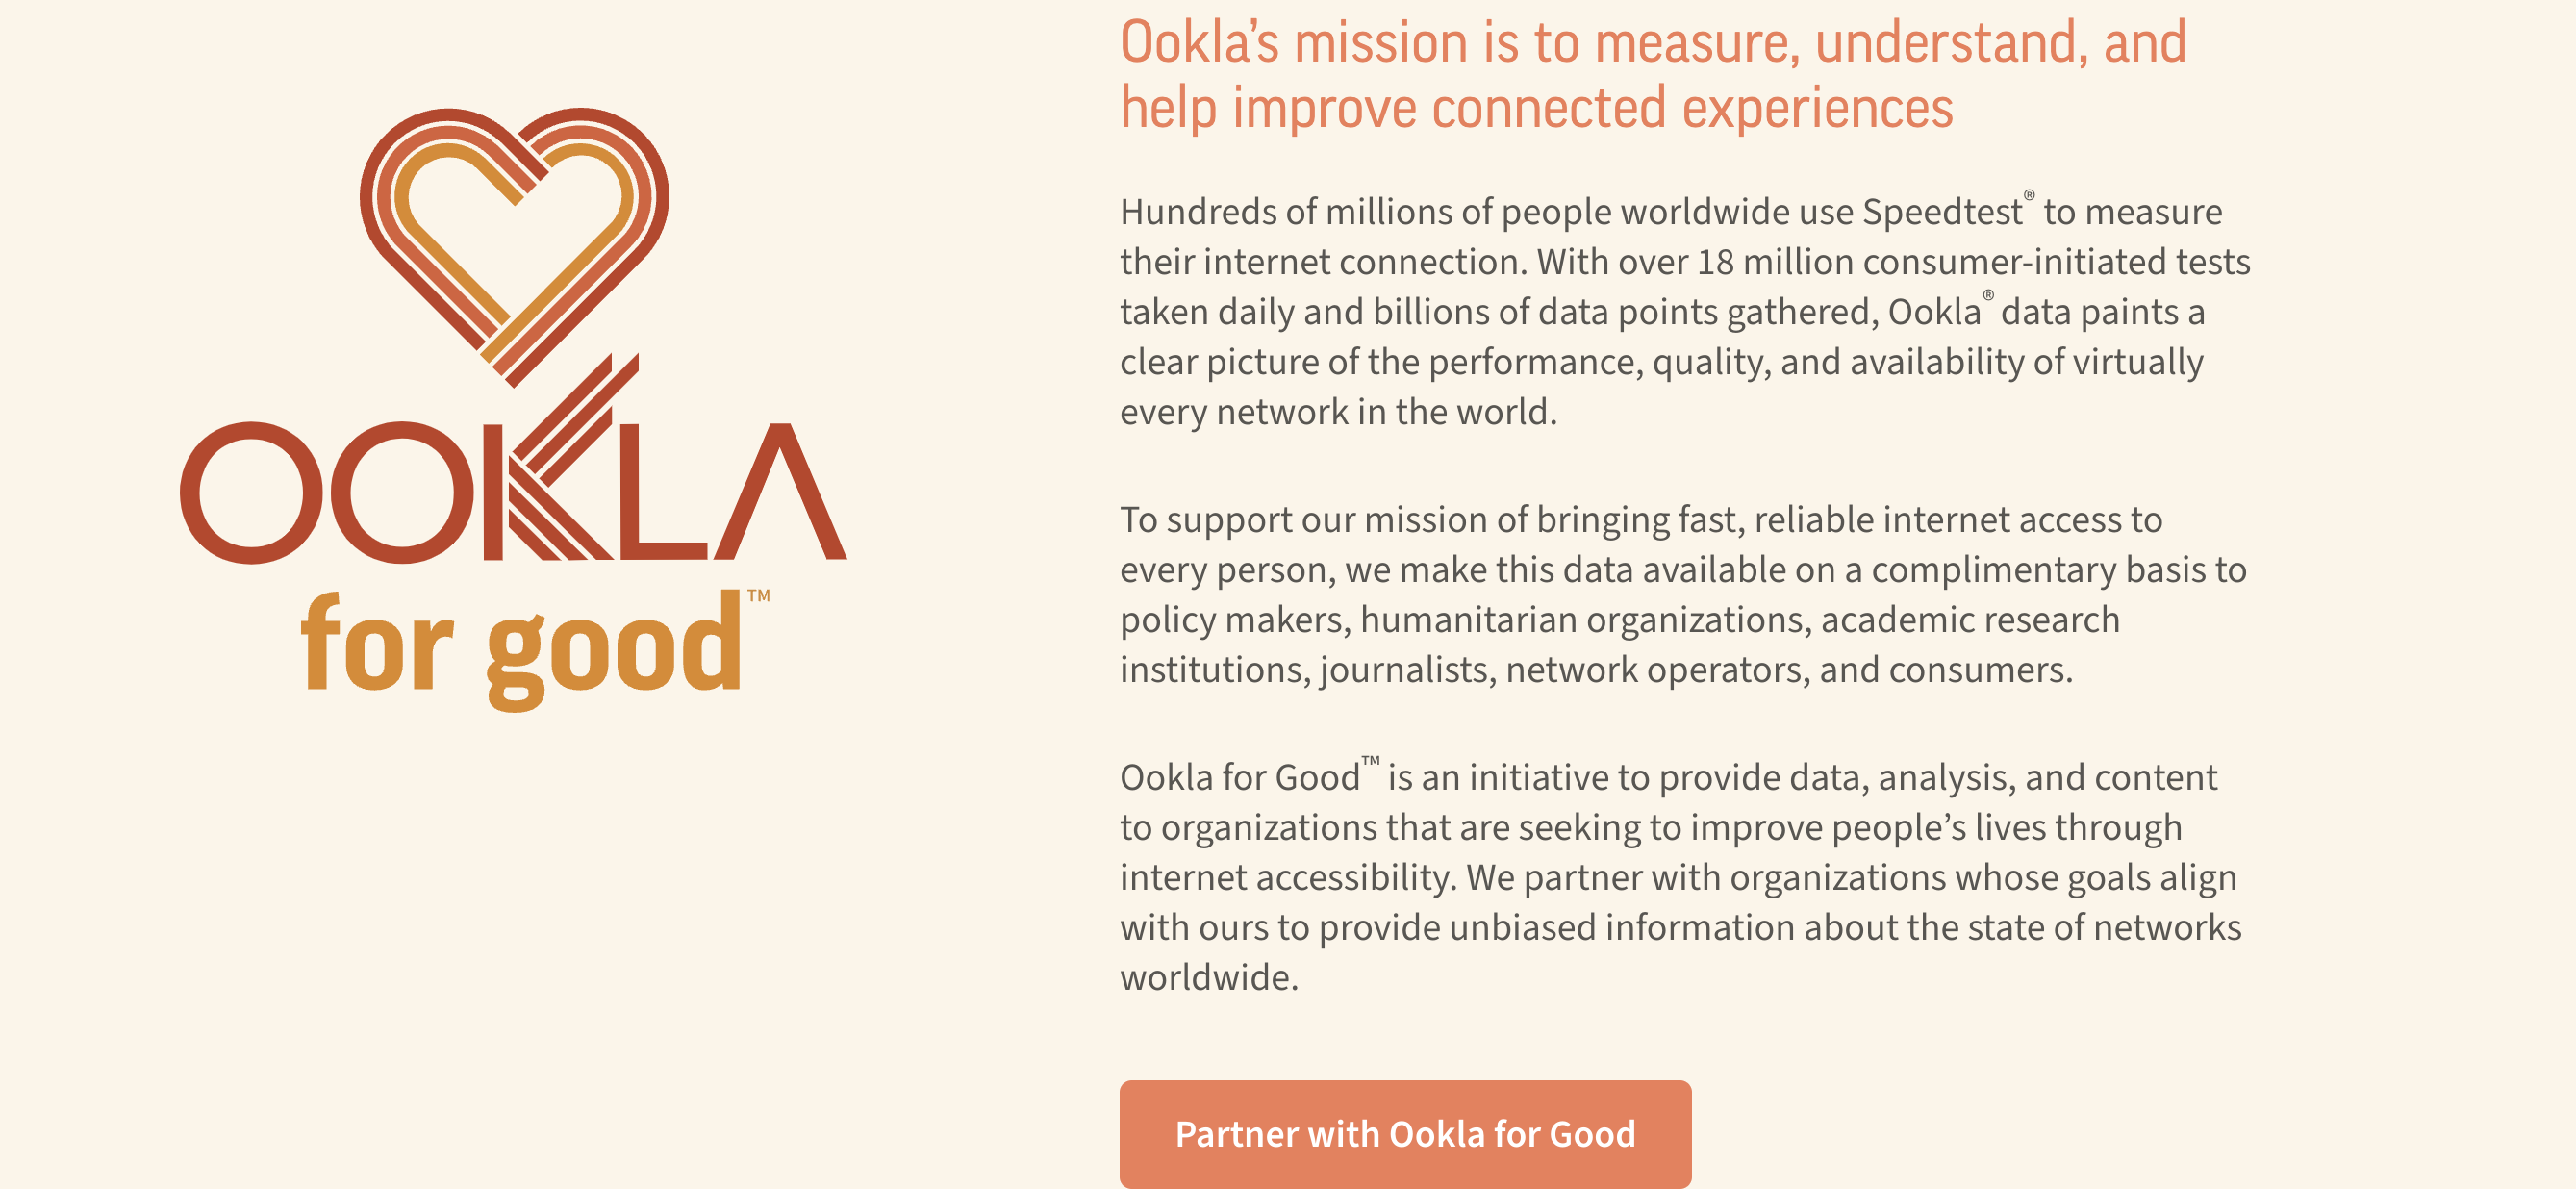

https://github.com/teamookla/ookla-open-data/tree/master

This dataset provides global fixed broadband and mobile (cellular) network performance metrics in zoom level 16 web mercator tiles (approximately 610.8 meters by 610.8 meters at the equator). Data is provided in both Shapefile format as well as Apache Parquet with geometries represented in Well Known Text (WKT) projected in EPSG:4326. Download speed, upload speed, and latency are collected via the Speedtest by Ookla applications for Android and iOS and averaged for each tile. Measurements are filtered to results containing GPS-quality location accuracy.

* avg_d_kbps : The average download speed of all tests performed in the tile, represented in kilobits per second.
* avg_u_kbps : The average upload speed of all tests performed in the tile, represented in kilobits per second.
* tests : The number of tests taken in the tile.
* devices : The number of unique devices contributing tests in the tile.

In [4]:
# Funciones necesarias para conectarse al entorno en AWS en donde están almacenados los datos
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_{service_type}_tiles.zip"
    return url

In [ ]:
tile_url = get_tile_url("mobile", 2023, 1)
tile_url

In [ ]:
#tiles = gpd.read_file(tile_url)

In [5]:
# Leemos las geometrías de los departamentos del Perú
peru_shape = gpd.read_file('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/Analisis_datos_espaciales/peru_departamental_simple.geojson')

In [6]:
peru_shape.shape

(25, 5)

<Axes: >

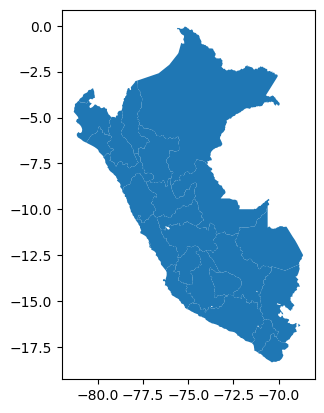

In [7]:
peru_shape.plot()

In [ ]:
#tiles_peru = tiles.sjoin(peru_shape)

In [8]:
# Leemos la información a nivel de tile. Previamente han sido descargado y filtrados
tiles_peru = gpd.read_file('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/Analisis_datos_espaciales/peru_tiles_mobile_ookla.geojson')

In [9]:
tiles_peru.shape

(14832, 12)

In [10]:
type(tiles_peru)

geopandas.geodataframe.GeoDataFrame

In [11]:
peru_shape.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [12]:
tiles_peru

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,2100013013232303,37567,16464,51,12,4,23,TUMBES,13,24,469026.014,"POLYGON ((-80.39246 -3.49697, -80.38696 -3.496..."
1,2100013013320210,28998,912,31,1,1,23,TUMBES,13,24,469026.014,"POLYGON ((-80.32104 -3.44762, -80.31555 -3.447..."
2,2100013013322000,2679,2980,38,1,1,23,TUMBES,13,24,469026.014,"POLYGON ((-80.33203 -3.46956, -80.32654 -3.469..."
3,2100013013323013,270,815,238,1,1,23,TUMBES,13,24,469026.014,"POLYGON ((-80.27161 -3.47504, -80.26611 -3.475..."
4,2100013013323031,10693,1095,50,1,1,23,TUMBES,13,24,469026.014,"POLYGON ((-80.27161 -3.48052, -80.26611 -3.480..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14827,2100331200021031,12042,13696,35,6,2,22,TACNA,27,23,1608306.709,"POLYGON ((-70.25208 -18.07276, -70.24658 -18.0..."
14828,2100331200021032,32259,20273,31,1,1,22,TACNA,27,23,1608306.709,"POLYGON ((-70.25757 -18.07798, -70.25208 -18.0..."
14829,2100331200021100,29879,22681,37,11,5,22,TACNA,27,23,1608306.709,"POLYGON ((-70.24658 -18.06231, -70.24109 -18.0..."
14830,2100331200021102,45408,34046,35,2,2,22,TACNA,27,23,1608306.709,"POLYGON ((-70.24658 -18.06753, -70.24109 -18.0..."


In [ ]:
#tiles_peru.to_file('peru_tiles_mobile_ookla.geojson',driver='GeoJSON')

In [ ]:
#tiles.to_file('All_tiles_mobile_ookla.geojson',driver='GeoJSON')

## Agregación por Departamento

In [44]:
tiles_peru['avg_d_mbps'] = np.round(tiles_peru['avg_d_kbps']/1000,1)

In [45]:
tiles_peru.groupby('NOMBDEP').agg({'avg_d_mbps':'mean'}).sort_values('avg_d_mbps')

,avg_d_mbps
NOMBDEP,
CAJAMARCA,19.884131
HUANCAVELICA,20.105108
UCAYALI,20.172727
LORETO,20.357778
AMAZONAS,21.398655
PUNO,21.727273
APURIMAC,22.250825
HUANUCO,22.290395
CALLAO,23.368881


In [46]:
# Función para calcular el promedio ponderado a través de la velocidad y el número de pruebas de cada tile
def weighted_mean(group, avg_name, weight_name):
     """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
         In rare instance, we may not have weights, so just return the mean. Customize this if your business case
     should return otherwise.
     """
     d = group[avg_name]
     w = group[weight_name]
     try:
         return (d * w).sum() / w.sum()
     except ZeroDivisionError:
         return d.mean()

def weighted_avg(group):
    return (group['avg_d_mbps'] * group['tests']).sum() / group['tests'].sum()

In [47]:
agg_dep = tiles_peru.groupby('NOMBDEP').apply(weighted_avg).reset_index()

# Renombra las columnas del resultado
agg_dep.columns = ['NOMBDEP', 'Weighted_Avg']
agg_dep.sort_values('Weighted_Avg')

,NOMBDEP,Weighted_Avg
24,UCAYALI,19.347931
15,LORETO,19.604334
20,PUNO,19.752858
5,CAJAMARCA,19.807694
0,AMAZONAS,20.529963
2,APURIMAC,21.115940
7,CUSCO,21.125263
8,HUANCAVELICA,21.295537
4,AYACUCHO,21.546846
11,JUNIN,21.664541


<Axes: >

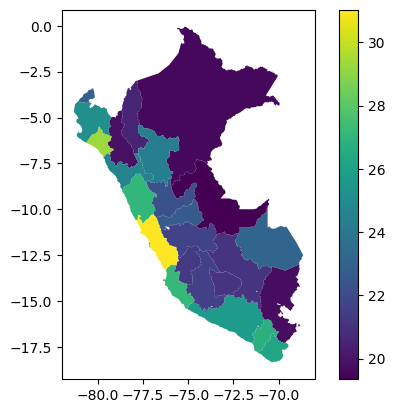

In [48]:
peru_shape.merge(agg_dep).plot(column='Weighted_Avg', legend=True)

<Axes: >

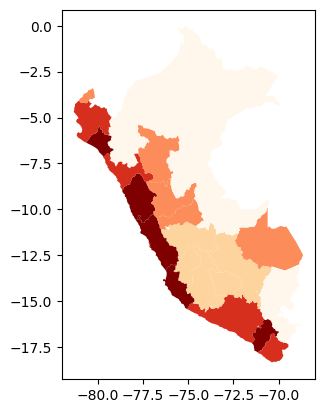

In [49]:
peru_shape.merge(agg_dep).plot(column='Weighted_Avg', cmap='OrRd', scheme='quantiles')

## Agregación por Distrito - Lima

 A continuación realizamos el ejercicio agregando la información de distrito al que corresponde cada Tile. Para ello leeremos otro geo dataframe que contiene las geometrías de los distritos de Lima Metropolitana.

In [18]:
tiles_peru['NOMBDEP'].value_counts()

NOMBDEP
LIMA             3163
AREQUIPA         1139
CUSCO             890
PIURA             878
JUNIN             806
LA LIBERTAD       773
CAJAMARCA         731
ANCASH            685
PUNO              682
ICA               554
LAMBAYEQUE        515
AYACUCHO          481
SAN MARTIN        462
HUANCAVELICA      372
HUANUCO           354
TACNA             307
APURIMAC          303
CALLAO            286
LORETO            270
UCAYALI           242
AMAZONAS          223
MOQUEGUA          220
PASCO             198
MADRE DE DIOS     152
TUMBES            146
Name: count, dtype: int64

In [51]:
tiles_lim = tiles_peru[tiles_peru['NOMBDEP'].isin(['LIMA','CALLAO'])]
tiles_lim.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,avg_d_mbps
5279,2100122230110110,10300,1697,67,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.75024 -10.48781, -77.74475 -10.4...",10.3
5280,2100122230120022,29567,24299,37,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.87109 -10.59042, -77.86560 -10.5...",29.6
5281,2100122230123231,22766,43281,18,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.81067 -10.64981, -77.80518 -10.6...",22.8
5282,2100122230130230,18756,19369,17,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.77222 -10.60662, -77.76672 -10.6...",18.8
5283,2100122230133330,96970,31408,25,3,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.70630 -10.64981, -77.70081 -10.6...",97.0


In [20]:
# Leemos las geometrías de Lima Metropolitana + Callao
lima_dis = gpd.read_file('https://raw.githubusercontent.com/joseluisq/peru-geojson-datasets/master/lima_callao_distritos.geojson')

<Axes: >

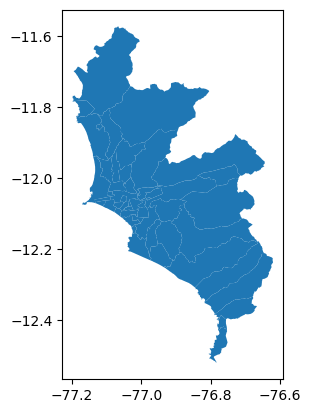

In [21]:
lima_dis.plot()

In [52]:
# Actualmente el dataframe no contiene información del distrito asignado a cada tile
tiles_lim.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,avg_d_mbps
5279,2100122230110110,10300,1697,67,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.75024 -10.48781, -77.74475 -10.4...",10.3
5280,2100122230120022,29567,24299,37,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.87109 -10.59042, -77.86560 -10.5...",29.6
5281,2100122230123231,22766,43281,18,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.81067 -10.64981, -77.80518 -10.6...",22.8
5282,2100122230130230,18756,19369,17,1,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.77222 -10.60662, -77.76672 -10.6...",18.8
5283,2100122230133330,96970,31408,25,3,1,14,LIMA,171,15,3498999.431,"POLYGON ((-77.70630 -10.64981, -77.70081 -10.6...",97.0


In [53]:
# Eliminamos la columna index_right. Sin esto el join espacial no funciona
tiles_lim.drop('index_right', axis=1,inplace=True)

In [54]:
# Join spatial. Se creará la columna distrito
tiles_lim_dis = tiles_lim.sjoin(lima_dis)

In [55]:
tiles_lim_dis.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,avg_d_mbps,index_right,id,departamento,provincia,distrito,institucion,distrito2
5714,2100300102211103,8097,7708,52,1,1,LIMA,171,15,3498999.431,"POLYGON ((-77.18445 -11.70065, -77.17896 -11.7...",8.1,5,13,LIMA,LIMA,ANCON,IGN,None
5715,2100300102213311,9017,5747,27,2,2,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.75981, -77.16797 -11.7...",9.0,5,13,LIMA,LIMA,ANCON,IGN,None
5716,2100300102213313,39895,22235,21,3,2,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.76519, -77.16797 -11.7...",39.9,5,13,LIMA,LIMA,ANCON,IGN,None
5717,2100300102213330,61486,22700,20,6,6,LIMA,171,15,3498999.431,"POLYGON ((-77.17896 -11.77057, -77.17346 -11.7...",61.5,5,13,LIMA,LIMA,ANCON,IGN,None
5718,2100300102213331,50053,15403,16,4,3,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.77057, -77.16797 -11.7...",50.1,5,13,LIMA,LIMA,ANCON,IGN,None


In [57]:
# Agrupamos la información por cada distrito y nos quedamos con la mediana (valor medio) por cada distrito y ordenamos de menor a mayor
agg_dis = tiles_lim_dis.groupby('distrito').agg({'avg_d_mbps':'median'}).reset_index()
agg_dis.sort_values('avg_d_mbps')

,distrito,avg_d_mbps
27,PUCUSANA,7.35
24,MI PERÃz,12.10
6,CARABAYLLO,14.90
48,VILLA MARIA DEL TRIUNFO,15.10
29,PUENTE PIEDRA,16.90
46,VENTANILLA,17.50
22,LURIN,17.50
21,LURIGANCHO,17.70
47,VILLA EL SALVADOR,18.10
11,COMAS,18.45


In [58]:
# El geodataframe lima_dis contiene loas geometrías de los distritos. Le agregaremos (merge) la información de la velocidad mediana calculada en el paso anterior.
lima_dis_dl = lima_dis.merge(agg_dis)
lima_dis_dl.head()

,id,departamento,provincia,distrito,institucion,distrito2,geometry,avg_d_mbps
0,2,LIMA,LIMA,SAN BORJA,IGN,San Borja,"MULTIPOLYGON (((-76.98587 -12.08173, -76.98585...",41.75
1,6,LIMA,LIMA,JESUS MARIA,IGN,None,"MULTIPOLYGON (((-77.04242 -12.08297, -77.04311...",37.00
2,7,LIMA,LIMA,PACHACAMAC,IGN,None,"MULTIPOLYGON (((-76.87588 -12.07350, -76.87582...",19.00
3,10,LIMA,LIMA,SAN LUIS,IGN,None,"MULTIPOLYGON (((-76.99780 -12.06084, -76.99810...",19.90
4,12,LIMA,LIMA,LA MOLINA,IGN,None,"MULTIPOLYGON (((-76.94139 -12.06207, -76.94137...",42.00


In [28]:
lima_dis_dl.shape

(49, 8)

In [63]:
lima_dis_dl.describe()

,id,avg_d_mbps
count,49.000000,49.000000
mean,25.959184,27.617347
std,14.358446,12.347611
min,1.000000,7.350000
25%,14.000000,19.000000
50%,26.000000,22.200000
75%,38.000000,35.450000
max,50.000000,67.050000


<Axes: >

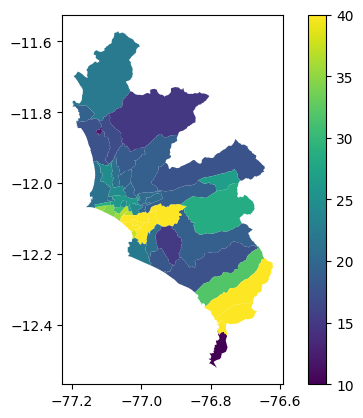

In [64]:
lima_dis_dl.plot(column='avg_d_mbps',legend=True, vmax=40, vmin=10)

# Tile Map: Lima

Finalmente usaremos la información de cada quadkey o tile, y aprovechando el campo geometry, dibujaremos un mapa e indicaremos por cada tile la velocidad reportada.

In [65]:
tiles_lim_dis.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,avg_d_mbps,index_right,id,departamento,provincia,distrito,institucion,distrito2
5714,2100300102211103,8097,7708,52,1,1,LIMA,171,15,3498999.431,"POLYGON ((-77.18445 -11.70065, -77.17896 -11.7...",8.1,5,13,LIMA,LIMA,ANCON,IGN,None
5715,2100300102213311,9017,5747,27,2,2,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.75981, -77.16797 -11.7...",9.0,5,13,LIMA,LIMA,ANCON,IGN,None
5716,2100300102213313,39895,22235,21,3,2,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.76519, -77.16797 -11.7...",39.9,5,13,LIMA,LIMA,ANCON,IGN,None
5717,2100300102213330,61486,22700,20,6,6,LIMA,171,15,3498999.431,"POLYGON ((-77.17896 -11.77057, -77.17346 -11.7...",61.5,5,13,LIMA,LIMA,ANCON,IGN,None
5718,2100300102213331,50053,15403,16,4,3,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.77057, -77.16797 -11.7...",50.1,5,13,LIMA,LIMA,ANCON,IGN,None


In [66]:
tiles_lim_dis.shape

(3356, 19)

<Axes: >

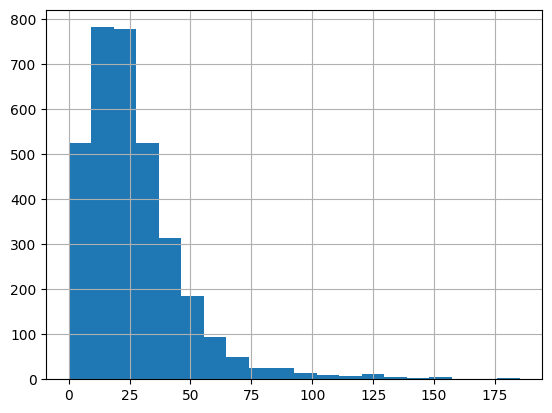

In [67]:
tiles_lim_dis['avg_d_mbps'].hist(bins=20)

In [68]:
type(tiles_lim_dis)

geopandas.geodataframe.GeoDataFrame

In [69]:
# Discretizamos la información de Velocidad. Para ello crearemos una nueva columna llamada group y partiremos en grupos de acuerdo a los rangos creados
labels = ["0 a 10", "10 a 20", "20 a 30", "30 a 50", "50 a +"]

tiles_lim_dis['group'] = pd.cut(
    tiles_lim_dis.avg_d_mbps,
    (0,10,20,30,50,2000),
    right=False,
    labels = labels
)

In [70]:
tiles_lim_dis.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,avg_d_mbps,index_right,id,departamento,provincia,distrito,institucion,distrito2,group
5714,2100300102211103,8097,7708,52,1,1,LIMA,171,15,3498999.431,"POLYGON ((-77.18445 -11.70065, -77.17896 -11.7...",8.1,5,13,LIMA,LIMA,ANCON,IGN,None,0 a 10
5715,2100300102213311,9017,5747,27,2,2,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.75981, -77.16797 -11.7...",9.0,5,13,LIMA,LIMA,ANCON,IGN,None,0 a 10
5716,2100300102213313,39895,22235,21,3,2,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.76519, -77.16797 -11.7...",39.9,5,13,LIMA,LIMA,ANCON,IGN,None,30 a 50
5717,2100300102213330,61486,22700,20,6,6,LIMA,171,15,3498999.431,"POLYGON ((-77.17896 -11.77057, -77.17346 -11.7...",61.5,5,13,LIMA,LIMA,ANCON,IGN,None,50 a +
5718,2100300102213331,50053,15403,16,4,3,LIMA,171,15,3498999.431,"POLYGON ((-77.17346 -11.77057, -77.16797 -11.7...",50.1,5,13,LIMA,LIMA,ANCON,IGN,None,50 a +


In [71]:
# Función necesaria para dibujar las geometrías usando Plotly
from shapely.geometry import LineString, MultiLineString
def shapefile_to_geojson(data, index_list, level = 1, tolerance=0.0001):
	geo_names = list(data['index'])
	geojson = {'type': 'FeatureCollection', 'features': []}
	for index in index_list:
		geo = data['geometry'][index].simplify(tolerance)

		if isinstance(geo.boundary, LineString):
			gtype = 'Polygon'
			bcoords = np.dstack(geo.boundary.coords.xy).tolist()

		elif isinstance(geo.boundary, MultiLineString):
			gtype = 'MultiPolygon'
			bcoords = []
			for b in geo.boundary:
				x, y = b.coords.xy
				coords = np.dstack((x,y)).tolist()
				bcoords.append(coords)
		else: pass

		feature = {'type': 'Feature',
                   'id' : index,
                   'properties': {'name': geo_names[index]},
                   'geometry': {'type': gtype,
                                'coordinates': bcoords},
					}

		geojson['features'].append(feature)
	return geojson

In [72]:
color_dl = [

    ((0.0, '#d7191c'), (1.0, '#d7191c')),
    ((0.0, '#fdae61'), (1.0, '#fdae61')),
    ((0.0, '#ffffbf'), (1.0, '#ffffbf')),
    ((0.0, '#abdda4'), (1.0, '#abdda4')),
    ((0.0, '#2b83ba'), (1.0, '#2b83ba'))

]

token = 'pk.eyJ1IjoiY3Jpc3RoaWFuY2FzdHJvIiwiYSI6ImNqeHA5NmU1MTA4MGkzYnM1YXVrejVzOXcifQ.HlvYODLUeII-RjguTftjnw'
lat_, long_ = -12.085707, -77.016365
import plotly.graph_objects as go

def plot_categorical(bis_freq_att,col_cat,col,map_):

    fig = go.Figure()
    for i, winner in enumerate(bis_freq_att.sort_values(col)[col_cat].unique()):
        dfp = bis_freq_att.loc[bis_freq_att[col_cat] == winner]
        dfp.reset_index(inplace=True)
        dfp.drop('index',axis=1,inplace=True)
        dfp.reset_index(inplace=True)
        a1 = list(dfp.index)
        data_geojson1 = shapefile_to_geojson(dfp,a1)
        df_geo1 = pd.DataFrame(dfp)


        fig.add_choroplethmapbox(geojson=data_geojson1, locations=df_geo1['index'],
                                z=[i,] * len(dfp),
                                showlegend=True, name=winner,
                                marker_line_width=0,
                                marker_opacity = 0.7,
                                #text = df_geo1['tile_id'],
                                colorscale=color_dl[i], showscale=False)

    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                    mapbox_style=map_,
                    mapbox_accesstoken=token,
                    mapbox_zoom=8,
                    height=850,
                    #,
                    mapbox_center = {"lat": lat_, "lon":long_},)

    fig.update_layout(legend=dict(
        yanchor="bottom",
        x=0.99,
        xanchor="right",
        y=0.8
    ))

    return fig

Paletas de colores
https://colorbrewer2.org/#type=sequential&scheme=GnBu&n=7

In [73]:
tiles_lim_dis.shape

(3356, 20)

In [74]:
plot_categorical(tiles_lim_dis,'group','avg_d_mbps','light')

# Referencias

- GeoPandas User Guide: https://geopandas.org/en/stable/docs/user_guide.html
- Ooka Open Dataset: https://www.ookla.com/ookla-for-good/open-data